### 0. Imports

In [7]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import math
import re
import numpy as np


# Visualizaciones
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Para modelos NLP
# -----------------------------------------------------------------------
import spacy
from nltk.corpus import stopwords
import nltk
import contractions
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler


from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity #  Cosine Similarity post Vectorizacion



# Configuración de pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)


# Gestionar emojis
# -----------------------------------------------------------------------
from emoji_extractor.extract import Extractor
import emoji

# Otros
# -----------------------------------------------------------------------
from collections import Counter

import sys 
sys.path.append("..")

from src import soporte_sistemas_recomendacion as sr
import src.database_connection_support as dcs

# work with environment variables
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Retrieve database credentials
USERNAME = os.getenv("DATABASE_USERNAME")
PASSWORD = os.getenv("DATABASE_PASSWORD")
database_credentials = {"username":USERNAME,
                        "password":PASSWORD,
                        }

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Sistemas de recomendación

Hay un problema con el paquete de NLP de spacy, así que pasamos a sistema de recomendación por puntuación.

## 1.1 Basado en contenido - puntuacion

In [20]:
query = """
SELECT titulo, cali_imdb
FROM peliculas;
"""

titulos_puntuaciones = dcs.connect_and_query("prueba_tecnica", credentials_dict=database_credentials,query=query).dropna()
titulos_puntuaciones["cali_imdb"] = titulos_puntuaciones["cali_imdb"].astype(float)
titulos_puntuaciones.sample(5)

,titulo,cali_imdb
989,Sparsha,7.6
413,One Long Night,4.0
777,Slaughterhouse Slumber Party,4.8
170,Ungfrúin góða og húsið,6.2
658,The Smiling Man,9.1


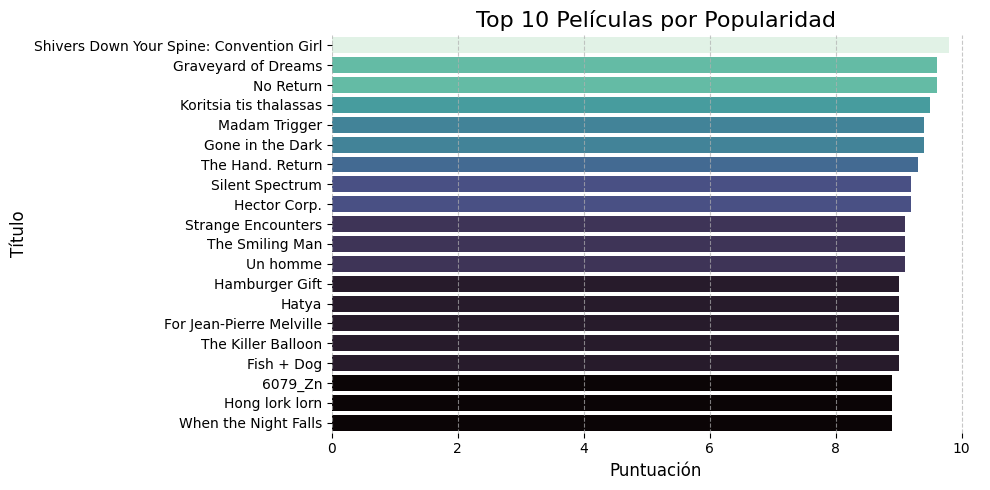

In [19]:
# lo primero que vamos a hacer es identificar las 20 peliculas más populares
df_ordenado_pop = titulos_puntuaciones.sort_values(by= 'cali_imdb' , ascending= False ) 
top_10_popular_movies = df_ordenado_pop.iloc[: 20 ]

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 5))

# Crear el gráfico de barras
ax = sns.barplot(
    y='titulo', 
    x='cali_imdb', 
    data=top_10_popular_movies, 
    palette="mako", 
    hue="cali_imdb",  # Eliminar leyenda duplicada
    legend=False  # No separar barras para cada categoría en hue
)

plt.title("Top 10 Películas por Popularidad", fontsize=16)
plt.xlabel("Puntuación", fontsize=12)
plt.ylabel("Título", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.tight_layout()